# From Distributions to Hypotheses

## Learning Objectives

- To understand what a probability density function is.
- To calculate probabilities of observing specific values. 
- To understand the standard normal distribution and why its so helpful

# BOOKMARK 06/05
- I am thinking of skipping the height stuff and going straight to salaries.

# CodeAlong

In [1]:
import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

sns.set_context('talk')
mpl.rcParams['figure.figsize'] = [12,6]

# Calculating Probabilities and Probability Density Functions (with scipy)

In [2]:
df = pd.read_csv("Data/weight-height.csv")
df

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


In [3]:
## taking smaller sample for easier vis
sample = df.sample(n=1000, random_state=321)

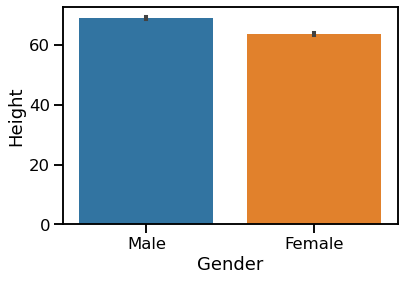

In [4]:
sns.barplot(data=sample, x='Gender',y='Height');

<!-- > Question:  -->

In [5]:
group_means = sample.groupby('Gender')['Height'].mean()
group_means

Gender
Female    63.765534
Male      69.102835
Name: Height, dtype: float64

<AxesSubplot:xlabel='Gender', ylabel='count'>

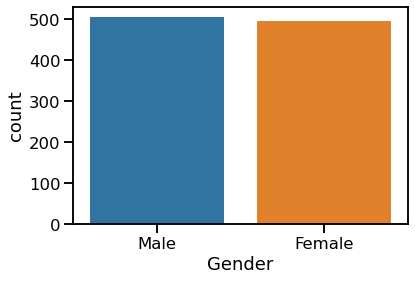

In [6]:
sns.countplot(data=sample, x='Gender')

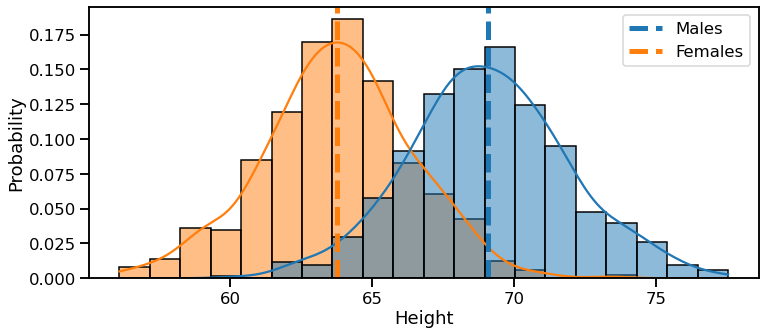

In [7]:
palette = {'Female':'tab:orange','Male':'tab:blue'}
fig, ax = plt.subplots(figsize=(12,5))

sns.histplot(data=sample, hue='Gender',x='Height',kde=True,stat='probability',
        ax=ax,palette=palette,common_norm=False,)

ax.axvline(group_means.loc['Male'], color=palette['Male'],ls='--',lw=5,
           label='Males')
ax.axvline(group_means.loc['Female'],color=palette['Female'],ls='--', lw=5,
           label='Females')
ax.legend();

In [8]:
group_stats = sample.groupby('Gender')['Height'].agg(['mean','std','min','max'])
group_stats

,mean,std,min,max
Gender,,,,
Female,63.765534,2.629671,56.105370,73.389586
Male,69.102835,2.812191,60.363312,77.547186


### Generating a Distribution with Scipy

In [9]:
# xs = x= np.linspace(curr_group.loc['min']-2, curr_group.loc['max']+2,)
# xs

In [10]:
def get_group_stats(sample, group, measure="Height", group_col="Gender", 
                    pad_x=2, include_data=True):
    ## Slice out group data
    temp_data = sample.loc[ sample[group_col]==group, [measure]]
    
    ## calculate x values that span the data min - pad_x to data max+pad_x
    xs = x= np.linspace(temp_data.min()-pad_x, temp_data.max()+pad_x)
    
    ## Save initial data to dict (group name, group col)
    group_data = {'group_col':group_col, 'group_name':group,
                  'measure_col':measure,
                  'mean': np.mean(temp_data.values),
                  'std':np.std(temp_data.values)}
    
    pdf = stats.norm.pdf(xs,loc=group_data["mean"], 
                          scale=group_data["std"])
    group_data['xs'] = xs.flatten()
    group_data['pdf'] = pdf.flatten()
    
    if include_data:
        group_data['data'] = temp_data.values.flatten()
    return group_data

In [11]:
females = get_group_stats(sample, "Female",include_data=False)
females.keys()

dict_keys(['group_col', 'group_name', 'measure_col', 'mean', 'std', 'xs', 'pdf'])

In [12]:
# females.pop('data')

In [13]:
females.keys()

dict_keys(['group_col', 'group_name', 'measure_col', 'mean', 'std', 'xs', 'pdf'])

In [14]:
## loop to save data for 
group_stats = {}

for gender in sample['Gender'].unique():
    
    group_stats[gender] = get_group_stats(sample,gender)

    
group_stats.keys()

dict_keys(['Male', 'Female'])

In [15]:
group_stats["Male"].keys()

dict_keys(['group_col', 'group_name', 'measure_col', 'mean', 'std', 'xs', 'pdf', 'data'])

In [16]:
curr_group = group_stats['Male']
curr_group.keys()

dict_keys(['group_col', 'group_name', 'measure_col', 'mean', 'std', 'xs', 'pdf', 'data'])

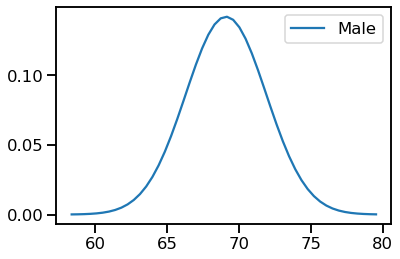

In [17]:
plt.plot(curr_group['xs'],curr_group['pdf'], label=curr_group['group_name'])
plt.legend()

In [18]:
# ax = sns.histplot(data=sample.loc[df['Gender']=='Male'],x='Height',
#                   kde=True, fill=False, stat='density',
#             label='KDE')
# ax.plot(xs,curr_pdf, label='PDF',color='k',ls=':')
# ax.legend()

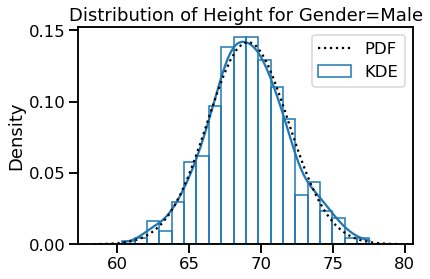

In [19]:
ax = sns.histplot(curr_group['data'],
                  kde=True, fill=False, stat='density',
            label='KDE')
ax.plot(curr_group['xs'],curr_group['pdf'], label='PDF',color='k',ls=':')
title = f"Distribution of {curr_group['measure_col']} for {curr_group['group_col']}={curr_group['group_name']}"
ax.set_title(title)
ax.legend()

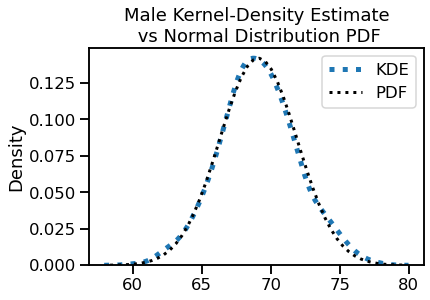

In [20]:
ax = sns.kdeplot(curr_group['data'], label='KDE',lw=5,ls=':')
ax.plot(curr_group['xs'],curr_group['pdf'], label='PDF',color='k',ls=':',lw=3)
ax.set_title(f"{curr_group['group_name']} Kernel-Density Estimate\n vs Normal Distribution PDF")
ax.legend()

> Make a point about how similar they are in shape and that we can calculate things from a perfect normal distribution that has the same mean and std

## Q: What is the probability of having a male that is **exactly** 60 inches tall?


(0.0, 0.14905334583643481)

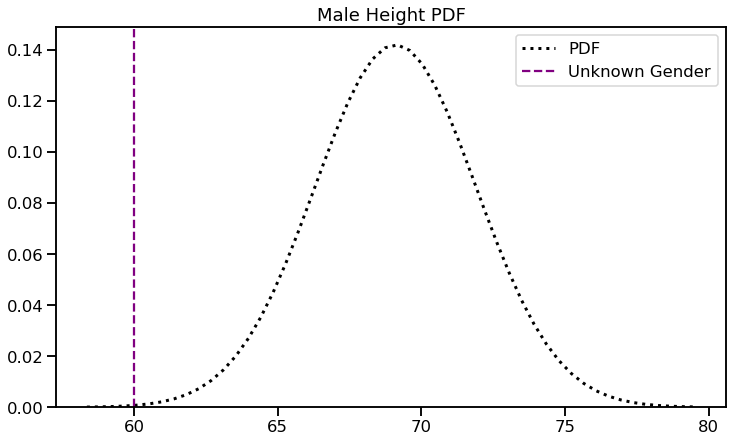

In [21]:

fig, ax = plt.subplots(figsize=(12,7))
ax.plot(curr_group['xs'],curr_group['pdf'], label='PDF',color='k',ls=':',lw=3)
ax.set_title("Male Height PDF")

ax.axvline(60,label='Unknown Gender',color='purple',ls='--')
ax.legend(bbox_to_anchor=[1,1])
ax.set_ylim(bottom=0)

In [22]:
p_male = stats.norm.pdf(60, loc=group_stats["Male"]['mean'], 
                          scale=group_stats["Male"]['std'])
p_male

0.0007457433386036126

In [23]:
p_female = stats.norm.pdf(60, loc=group_stats["Female"]['mean'], 
                          scale=group_stats["Female"]['std'])
p_female

0.054362037408430174

- Answer: 
    - The probability the person with an unknown gender is a male is 0.00075 (a .075% chance).
    - The probability they are a Fmale is 0.054 (a 5.4% chance).

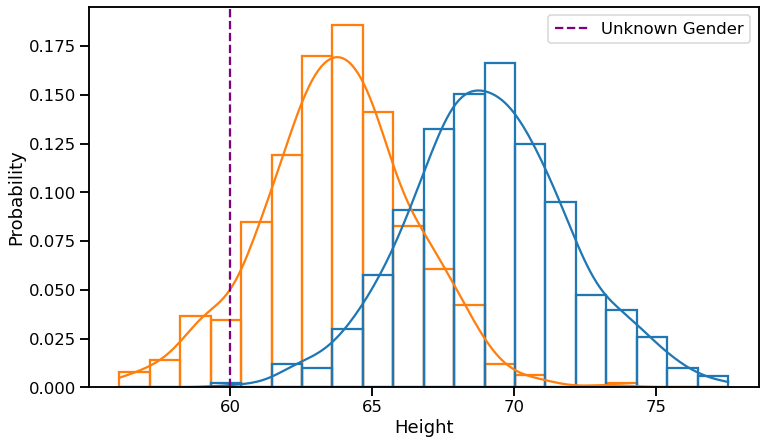

In [24]:
palette = {'Female':'tab:orange','Male':'tab:blue'}
fig, ax = plt.subplots(figsize=(12,7))
sns.histplot(data=sample, hue='Gender',x='Height',fill=False,kde=True,stat='probability',
        ax=ax,palette=palette,common_norm=False,)

ax.axvline(60,label='Unknown Gender',color='purple',ls='--')
ax.legend();

## Q: What is the probability of a female having a height of 70 inches ***or taller?***

(0.0, 0.15932929896978482)

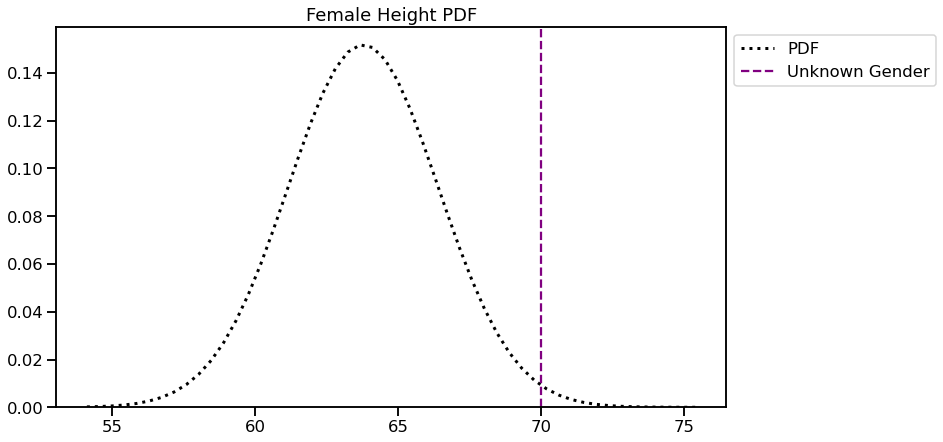

In [25]:


fig, ax = plt.subplots(figsize=(12,7))
ax.plot(group_stats["Female"]['xs'], group_stats['Female']['pdf'],
       label='PDF',color='k',ls=':',lw=3)

# ax.plot(curr_group['xs'],curr_group['pdf'], label='PDF',color='k',ls=':',lw=3)
ax.set_title("Female Height PDF")

ax.axvline(70,label='Unknown Gender',color='purple',ls='--')
ax.legend(bbox_to_anchor=[1,1])
ax.set_ylim(bottom=0)

### CDF vs PDF

In [26]:
male_cdf = stats.norm.cdf(group_stats['Male']['xs'], loc=group_stats["Male"]['mean'], 
                          scale=group_stats["Male"]['std'])
male_cdf

array([6.59981857e-05, 1.21836687e-04, 2.19931132e-04, 3.88233707e-04,
       6.70249103e-04, 1.13176919e-03, 1.86940869e-03, 3.02082796e-03,
       4.77615737e-03, 7.38963978e-03, 1.11899266e-02, 1.65868845e-02,
       2.40723284e-02, 3.42119553e-02, 4.76260788e-02, 6.49576741e-02,
       8.68277713e-02, 1.13780257e-01, 1.46220410e-01, 1.84353580e-01,
       2.28131882e-01, 2.77217118e-01, 3.30967162e-01, 3.88450604e-01,
       4.48490880e-01, 5.09737002e-01, 5.70753952e-01, 6.30122769e-01,
       6.86538766e-01, 7.38896657e-01, 7.86353408e-01, 8.28363132e-01,
       8.64682445e-01, 8.95348747e-01, 9.20637134e-01, 9.41003653e-01,
       9.57023134e-01, 9.69329107e-01, 9.78561609e-01, 9.85326469e-01,
       9.90167457e-01, 9.93550793e-01, 9.95860156e-01, 9.97399639e-01,
       9.98401929e-01, 9.99039235e-01, 9.99435000e-01, 9.99675030e-01,
       9.99817205e-01, 9.99899453e-01])

In [27]:
def get_group_stats(sample, group, measure="Height", group_col="Gender", 
                    pad_x=2, include_data=True):
    ## Slice out group data
    temp_data = sample.loc[ sample[group_col]==group, [measure]]
    
    ## calculate x values that span the data min - pad_x to data max+pad_x
    xs = x= np.linspace(temp_data.min()-pad_x, temp_data.max()+pad_x)
    
    ## Save initial data to dict (group name, group col)
    group_data = {'group_col':group_col, 'group_name':group,
                  'measure_col':measure,
                  'mean': np.mean(temp_data.values),
                  'std':np.std(temp_data.values)}
    
    pdf = stats.norm.pdf(xs,loc=group_data["mean"], 
                          scale=group_data["std"])
    
    cdf = stats.norm.cdf(xs, loc=group_data["mean"], 
                          scale=group_data["std"])
    group_data['xs'] = xs.flatten()
    group_data['pdf'] = pdf.flatten()
    group_data['cdf'] = cdf.flatten()
    
    if include_data:
        group_data['data'] = temp_data.values.flatten()
    return group_data

In [28]:
## loop to save data for 
group_stats = {}

for gender in sample['Gender'].unique():
    
    group_stats[gender] = get_group_stats(sample,gender)

    
print(group_stats.keys())
print(group_stats['Female'].keys())

dict_keys(['Male', 'Female'])
dict_keys(['group_col', 'group_name', 'measure_col', 'mean', 'std', 'xs', 'pdf', 'cdf', 'data'])


(0.0, 1.0498911257000874)

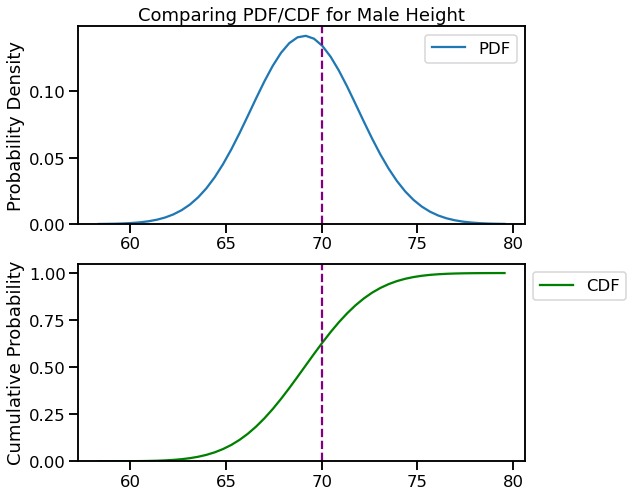

In [29]:
fig,axes =plt.subplots(nrows=2,figsize=(8,8),sharex=False)
axes[0].set_title(f'Comparing PDF/CDF for Male Height')
axes[0].plot(group_stats['Male']['xs'], group_stats['Male']['pdf'], label='PDF')
axes[0].set_ylabel('Probability Density')
axes[0].axvline(70,color='purple',ls='--')
axes[0].legend(bbox_to_anchor=[1,1])
axes[0].set_ylim(bottom=0)

axes[1].plot(group_stats['Male']['xs'], group_stats['Male']['cdf'], color='g',label='CDF')
axes[1].axvline(70,color='purple',ls='--')
axes[1].set_ylabel('Cumulative Probability')
axes[1].legend(bbox_to_anchor=[1,1])
axes[1].set_ylim(bottom=0)

In [30]:
p_male = 1 - stats.norm.cdf(70, loc=group_stats["Male"]['mean'], 
                          scale=group_stats["Male"]['std'])
p_male

0.3747330409047125

(0.0, 1.0499890382249821)

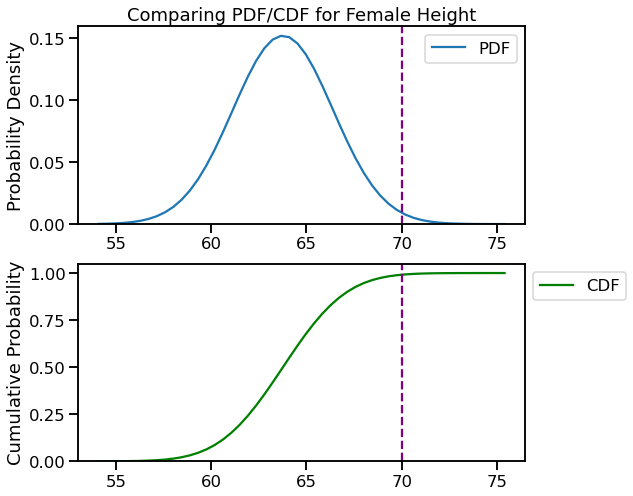

In [31]:
fig,axes =plt.subplots(nrows=2,figsize=(8,8),sharex=False)
axes[0].plot(group_stats['Female']['xs'], group_stats['Female']['pdf'], label='PDF')
axes[0].set_ylabel('Probability Density')
axes[0].set_title(f'Comparing PDF/CDF for Female Height')
axes[0].axvline(70,color='purple',ls='--')
axes[0].legend(bbox_to_anchor=[1,1])
axes[0].set_ylim(bottom=0)

axes[1].plot(group_stats['Female']['xs'], group_stats['Female']['cdf'], color='g',label='CDF')
axes[1].axvline(70,color='purple',ls='--')
axes[1].set_ylabel('Cumulative Probability')
axes[1].legend(bbox_to_anchor=[1,1])
axes[1].set_ylim(bottom=0)

In [32]:
p_female = 1 - stats.norm.cdf(70, loc=group_stats["Female"]['mean'], 
                          scale=group_stats["Female"]['std'])
p_female

0.00881701930767731

## Comparing Group Means

In [33]:
# !pip install kaggle

In [34]:
## download kaggle dataset using kaggle api
## employee annual salary: https://www.kaggle.com/datasets/dsfelix/employees-annual-salary-in-chicago
# !kaggle datasets download -d dsfelix/employees-annual-salary-in-chicago
# !ls -a

In [35]:
# ## unzip the downloaded dataset
# from zipfile import ZipFile,ZipInfo
# zfile = ZipFile("employees-annual-salary-in-chicago.zip")
# zfile.extractall()

In [36]:
## load data as df
df = pd.read_csv('salary.csv')
df = df.dropna(subset=['Annual Salary'])
# df = df.sample(n=10000,random_state=321)
df.info()
print(df.isna().sum())
df

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24287 entries, 0 to 31100
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               24287 non-null  object 
 1   Job Titles         24287 non-null  object 
 2   Department         24287 non-null  object 
 3   Full or Part-Time  24287 non-null  object 
 4   Salary or Hourly   24287 non-null  object 
 5   Typical Hours      0 non-null      float64
 6   Annual Salary      24287 non-null  float64
 7   Hourly Rate        0 non-null      float64
dtypes: float64(3), object(5)
memory usage: 1.7+ MB
Name                     0
Job Titles               0
Department               0
Full or Part-Time        0
Salary or Hourly         0
Typical Hours        24287
Annual Salary            0
Hourly Rate          24287
dtype: int64


,Name,Job Titles,Department,Full or Part-Time,Salary or Hourly,Typical Hours,Annual Salary,Hourly Rate
0,"AARON, JEFFERY M",SERGEANT,POLICE,F,Salary,NaN,122568.0,NaN
1,"AARON, KARINA",POLICE OFFICER (ASSIGNED AS DETECTIVE),POLICE,F,Salary,NaN,110796.0,NaN
2,"ABAD JR, VICENTE M",CIVIL ENGINEER IV,WATER MGMNT,F,Salary,NaN,122112.0,NaN
4,"ABARCA, FRANCES J",POLICE OFFICER,POLICE,F,Salary,NaN,86730.0,NaN
6,"ABBATEMARCO, JAMES J",FIRE ENGINEER-EMT,FIRE,F,Salary,NaN,118830.0,NaN
...,...,...,...,...,...,...,...,...
31096,"ZYLINSKA, KLAUDIA",POLICE OFFICER,POLICE,F,Salary,NaN,90990.0,NaN
31097,"ZYMANTAS, LAURA C",POLICE OFFICER,POLICE,F,Salary,NaN,95586.0,NaN
31098,"ZYMANTAS, MARK E",POLICE OFFICER,POLICE,F,Salary,NaN,102372.0,NaN
31099,"ZYRKOWSKI, CARLO E",POLICE OFFICER,POLICE,F,Salary,NaN,109236.0,NaN


In [37]:
df.nunique()

Name                 24125
Job Titles             948
Department              36
Full or Part-Time        1
Salary or Hourly         1
Typical Hours            0
Annual Salary          932
Hourly Rate              0
dtype: int64

In [38]:
df['Department'].value_counts()

POLICE                 12528
FIRE                    4801
PUBLIC LIBRARY           711
OEMC                     700
AVIATION                 680
HEALTH                   551
FINANCE                  446
TRANSPORTN               361
WATER MGMNT              352
LAW                      317
CITY COUNCIL             283
STREETS & SAN            281
FAMILY & SUPPORT         270
DAIS                     257
PUBLIC SAFETY ADMIN      236
BUILDINGS                232
BUSINESS AFFAIRS         161
HOUSING & ECON DEV       150
COPA                     122
BOARD OF ELECTION        109
MAYOR'S OFFICE            93
INSPECTOR GEN             93
CITY CLERK                81
PROCUREMENT               76
HOUSING                   73
HUMAN RESOURCES           69
CULTURAL AFFAIRS          58
ANIMAL CONTRL             56
ADMIN HEARNG              35
BUDGET & MGMT             31
TREASURER                 27
DISABILITIES              21
HUMAN RELATIONS           15
BOARD OF ETHICS            8
POLICE BOARD  

In [39]:
# keep only police and fire
df = df[ df['Department'].isin(['POLICE','FIRE'])]
df['Department'].value_counts()

POLICE    12528
FIRE       4801
Name: Department, dtype: int64

In [40]:
df

,Name,Job Titles,Department,Full or Part-Time,Salary or Hourly,Typical Hours,Annual Salary,Hourly Rate
0,"AARON, JEFFERY M",SERGEANT,POLICE,F,Salary,NaN,122568.0,NaN
1,"AARON, KARINA",POLICE OFFICER (ASSIGNED AS DETECTIVE),POLICE,F,Salary,NaN,110796.0,NaN
4,"ABARCA, FRANCES J",POLICE OFFICER,POLICE,F,Salary,NaN,86730.0,NaN
6,"ABBATEMARCO, JAMES J",FIRE ENGINEER-EMT,FIRE,F,Salary,NaN,118830.0,NaN
7,"ABBATE, TERRY M",POLICE OFFICER,POLICE,F,Salary,NaN,109236.0,NaN
...,...,...,...,...,...,...,...,...
31095,"ZYGMUNT, DAWID",POLICE OFFICER,POLICE,F,Salary,NaN,95586.0,NaN
31096,"ZYLINSKA, KLAUDIA",POLICE OFFICER,POLICE,F,Salary,NaN,90990.0,NaN
31097,"ZYMANTAS, LAURA C",POLICE OFFICER,POLICE,F,Salary,NaN,95586.0,NaN
31098,"ZYMANTAS, MARK E",POLICE OFFICER,POLICE,F,Salary,NaN,102372.0,NaN


In [41]:
sample = df.groupby('Department').sample(n=2000,random_state=321)
sample.info()
sample

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4000 entries, 24693 to 2970
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               4000 non-null   object 
 1   Job Titles         4000 non-null   object 
 2   Department         4000 non-null   object 
 3   Full or Part-Time  4000 non-null   object 
 4   Salary or Hourly   4000 non-null   object 
 5   Typical Hours      0 non-null      float64
 6   Annual Salary      4000 non-null   float64
 7   Hourly Rate        0 non-null      float64
dtypes: float64(3), object(5)
memory usage: 281.2+ KB


,Name,Job Titles,Department,Full or Part-Time,Salary or Hourly,Typical Hours,Annual Salary,Hourly Rate
24693,"SANDERS, ANTHONY J",CAPTAIN-EMT,FIRE,F,Salary,NaN,151764.0,NaN
20275,"O'LEARY, JOHN P",PARAMEDIC,FIRE,F,Salary,NaN,84612.0,NaN
21321,"PEREZ, ANDREW A",FIREFIGHTER-EMT (RECRUIT),FIRE,F,Salary,NaN,84612.0,NaN
28945,"VILLEGAS, RAFAEL",FIREFIGHTER-EMT (RECRUIT),FIRE,F,Salary,NaN,84612.0,NaN
16455,"LUJANO, HECTOR",FIRE ENGINEER-EMT,FIRE,F,Salary,NaN,114654.0,NaN
...,...,...,...,...,...,...,...,...
22555,"RAMOS JR, JUAN",POLICE OFFICER,POLICE,F,Salary,NaN,90990.0,NaN
11077,"HAINZL, RICHARD J",SERGEANT,POLICE,F,Salary,NaN,126504.0,NaN
27605,"THOMAS, TIMOTHY M",POLICE OFFICER,POLICE,F,Salary,NaN,109236.0,NaN
25709,"SIMMONS WILLIAMS, LADONNA F",POLICE OFFICER (ASSIGNED AS DETECTIVE),POLICE,F,Salary,NaN,110796.0,NaN


In [42]:
# 

In [43]:
sample['Department'].value_counts()

FIRE      2000
POLICE    2000
Name: Department, dtype: int64

In [44]:
# df['police'] = df['Department']=="POLICE"


<AxesSubplot:xlabel='Department', ylabel='Annual Salary'>

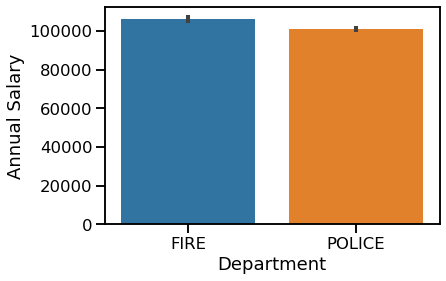

In [45]:
sns.barplot(data=sample, x='Department',y='Annual Salary')

In [46]:
sample['Annual Salary'].describe()

count      4000.000000
mean     103600.539480
std       20549.002988
min       49176.000000
25%       94152.000000
50%      102372.000000
75%      110796.000000
max      207624.000000
Name: Annual Salary, dtype: float64

In [47]:
from matplotlib.ticker import FuncFormatter

def format_salary_Ks(x,pos):
    x_out = x / 1000
    return f"${x_out:,.0f}K"


fmt_thous = FuncFormatter(format_salary_Ks)

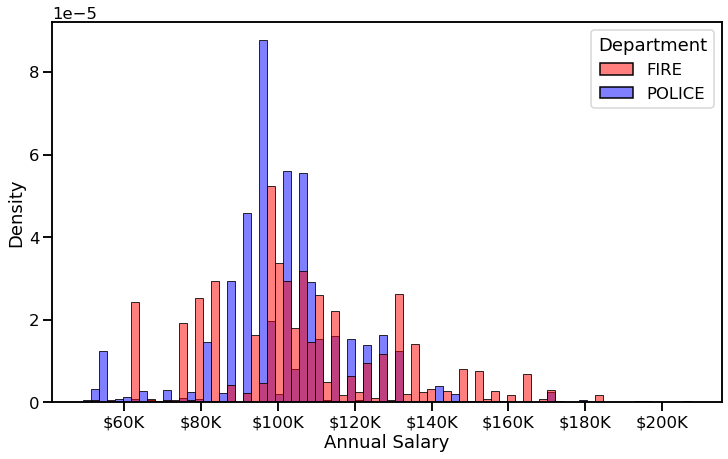

In [48]:
fig, ax = plt.subplots(figsize=(12,7))
palette = {'FIRE':'red', "POLICE":'blue'}
sns.histplot(data=sample, hue='Department',x='Annual Salary',kde=False,stat='density',
        common_norm=False,ax=ax,palette=palette)
ax.xaxis.set_major_formatter(fmt_thous)

In [49]:
group_means = sample.groupby('Department')['Annual Salary'].mean()
group_means

Department
FIRE      106168.42596
POLICE    101032.65300
Name: Annual Salary, dtype: float64

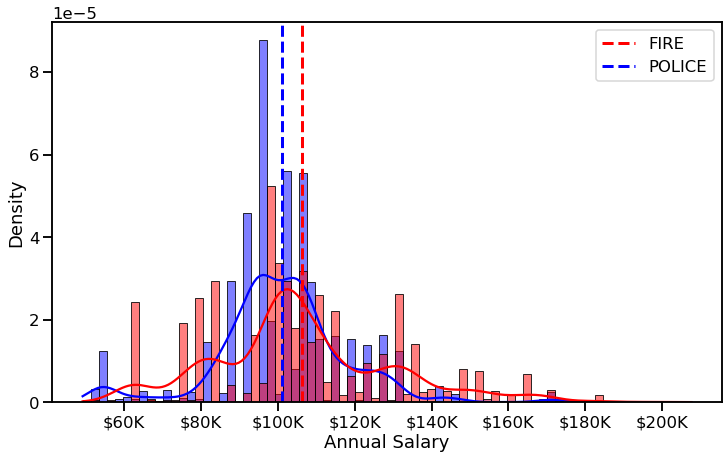

In [50]:
fig, ax = plt.subplots(figsize=(12,7))
palette = {'FIRE':'red', "POLICE":'blue'}
sns.histplot(data=sample, hue='Department',x='Annual Salary',kde=True,stat='density',
        common_norm=False,ax=ax,palette=palette)

ax.axvline(group_means.loc['FIRE'], color=palette['FIRE'],ls='--',lw=3,label='FIRE')
ax.axvline(group_means.loc['POLICE'], color=palette['POLICE'],ls='--',lw=3,label='POLICE')
ax.legend();
ax.xaxis.set_major_formatter(fmt_thous)

## Question: do fire fighters get paid SIGNIFICANTLY more than police?

- $H_0$: Fire fighters and police officers are paid similar annual salaries.
- $H_1$: Fire fighters and police officers are paid significantly different annual salaries.

In [51]:
grp_fire = sample.loc[sample['Department']=="FIRE", 'Annual Salary']
grp_police = sample.loc[sample['Department']=="POLICE", "Annual Salary"]

display(grp_fire.head(), grp_police.head())

24693    151764.0
20275     84612.0
21321     84612.0
28945     84612.0
16455    114654.0
Name: Annual Salary, dtype: float64

5707     102372.0
8516     106170.0
11684    170820.0
28773     90990.0
14665    106170.0
Name: Annual Salary, dtype: float64

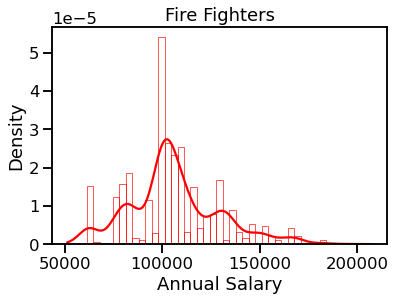

In [52]:
ax = sns.histplot(grp_fire,kde=True,fill=False,stat='density',color='red');
ax.set_title('Fire Fighters');

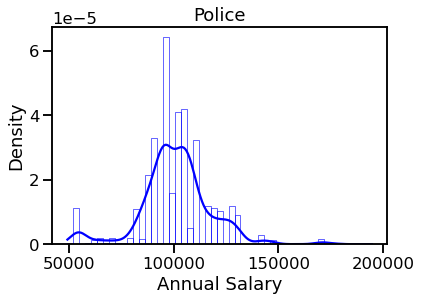

In [53]:
ax = sns.histplot(grp_police,kde=True,fill=False,stat='density',color='blue');
ax.set_title('Police');

In [54]:
## loop to save data for 
group_stats = {}

for dept in sample['Department'].unique():
    
    group_stats[dept] = get_group_stats(sample,dept,group_col='Department',
                                       measure='Annual Salary',pad_x=10_000)

    
group_stats.keys()

dict_keys(['FIRE', 'POLICE'])

In [55]:
group_stats['FIRE'].keys()

dict_keys(['group_col', 'group_name', 'measure_col', 'mean', 'std', 'xs', 'pdf', 'cdf', 'data'])

In [56]:
sample.groupby("Department")['Annual Salary'].agg(['mean','std','min','max'])

,mean,std,min,max
Department,,,,
FIRE,106168.42596,23281.362191,51408.0,207624.0
POLICE,101032.65300,17015.221986,49176.0,194628.0


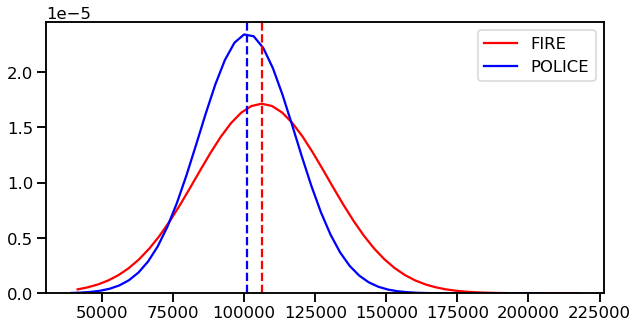

In [57]:
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(group_stats['FIRE']['xs'],group_stats['FIRE']['pdf'],color='red',
       label='FIRE')


ax.plot(group_stats['POLICE']['xs'],group_stats['POLICE']['pdf'],color='blue',
       label='POLICE')
ax.legend()
ax.set_ylim(bottom=0)

ax.axvline(group_stats['FIRE']['mean'], color='red',ls='--')
ax.axvline(group_stats['POLICE']['mean'], color='blue',ls='--')

In [58]:
# sample.groupby("Department")['Annual Salary'].mean().diff()

In [59]:
from scipy import stats

results = stats.ttest_ind(grp_fire, grp_police)
results

Ttest_indResult(statistic=7.9648819774785, pvalue=2.138127480957484e-15)

In [60]:
# g

# APPENDIX 

In [61]:
import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# sns.set_context('talk')
# mpl.rcParams['figure.figsize'] = [10,4]
mpl.rcParams['figure.facecolor'] = 'white'

## DF1 - Height/Weight

In [62]:
df1 = pd.read_csv("Data/weight-height.csv")
df1

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


## DF2 - Salaries

In [63]:
## load data as df
df2 = pd.read_csv('salary.csv')
df2 = df2.dropna(subset=['Annual Salary'])

# saving backup for later 
df2_orig = df2.copy()
# df = df.sample(n=10000,random_state=321)
df2.info()
print(df2.isna().sum())
df2

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24287 entries, 0 to 31100
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               24287 non-null  object 
 1   Job Titles         24287 non-null  object 
 2   Department         24287 non-null  object 
 3   Full or Part-Time  24287 non-null  object 
 4   Salary or Hourly   24287 non-null  object 
 5   Typical Hours      0 non-null      float64
 6   Annual Salary      24287 non-null  float64
 7   Hourly Rate        0 non-null      float64
dtypes: float64(3), object(5)
memory usage: 1.7+ MB
Name                     0
Job Titles               0
Department               0
Full or Part-Time        0
Salary or Hourly         0
Typical Hours        24287
Annual Salary            0
Hourly Rate          24287
dtype: int64


,Name,Job Titles,Department,Full or Part-Time,Salary or Hourly,Typical Hours,Annual Salary,Hourly Rate
0,"AARON, JEFFERY M",SERGEANT,POLICE,F,Salary,NaN,122568.0,NaN
1,"AARON, KARINA",POLICE OFFICER (ASSIGNED AS DETECTIVE),POLICE,F,Salary,NaN,110796.0,NaN
2,"ABAD JR, VICENTE M",CIVIL ENGINEER IV,WATER MGMNT,F,Salary,NaN,122112.0,NaN
4,"ABARCA, FRANCES J",POLICE OFFICER,POLICE,F,Salary,NaN,86730.0,NaN
6,"ABBATEMARCO, JAMES J",FIRE ENGINEER-EMT,FIRE,F,Salary,NaN,118830.0,NaN
...,...,...,...,...,...,...,...,...
31096,"ZYLINSKA, KLAUDIA",POLICE OFFICER,POLICE,F,Salary,NaN,90990.0,NaN
31097,"ZYMANTAS, LAURA C",POLICE OFFICER,POLICE,F,Salary,NaN,95586.0,NaN
31098,"ZYMANTAS, MARK E",POLICE OFFICER,POLICE,F,Salary,NaN,102372.0,NaN
31099,"ZYRKOWSKI, CARLO E",POLICE OFFICER,POLICE,F,Salary,NaN,109236.0,NaN


In [64]:
# keep only police and fire
df2 = df2[ df2['Department'].isin(['POLICE','FIRE'])]
df2['Department'].value_counts()

POLICE    12528
FIRE       4801
Name: Department, dtype: int64

In [65]:
# sns.countplot(data=df2, x='Department');

In [66]:


from matplotlib.ticker import FuncFormatter

def format_salary_Ks(x,pos):
    x_out = x / 1000
    return f"${x_out:,.0f}K"


fmt_thous = FuncFormatter(format_salary_Ks)

### EDA for Lesson

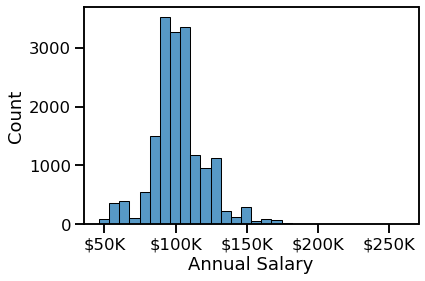

In [67]:
# overall distribtuions 
ax = sns.histplot(data=df2,x='Annual Salary',stat='count',bins=30)
ax.xaxis.set_major_formatter(fmt_thous)

- Removing outliers for visualizations

In [68]:
outliers = np.abs(stats.zscore(df2['Annual Salary']))>3
outliers

0        False
1        False
4        False
6        False
7        False
         ...  
31095    False
31096    False
31097    False
31098    False
31099    False
Name: Annual Salary, Length: 17329, dtype: bool

In [69]:
# def find_outliers_Z(data, verbose=True):
#     outliers = np.abs(stats.zscore(data))>3
    
#     if verbose:
#         print(f"- {outliers.sum()} outliers found in {data.name} using Z-Scores.")
#     return outliers


def find_outliers_IQR(data, verbose=True):
    q3 = np.quantile(data,.75)
    q1 = np.quantile(data,.25)

    IQR = q3 - q1
    upper_threshold = q3 + 1.5*IQR
    lower_threshold = q1 - 1.5*IQR
    
    outliers = (data<lower_threshold) | (data>upper_threshold)
    if verbose:
        print(f"- {outliers.sum()} outliers found in {data.name} using IQR.")
        
    return outliers

outliers = find_outliers_IQR(df2['Annual Salary'])

- 1862 outliers found in Annual Salary using IQR.


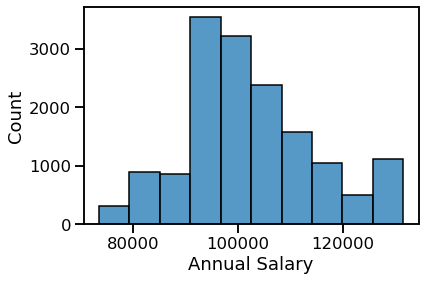

In [70]:
# overall distribtuions 
ax = sns.histplot(data=df2[~outliers],x='Annual Salary',stat='count',bins=10)

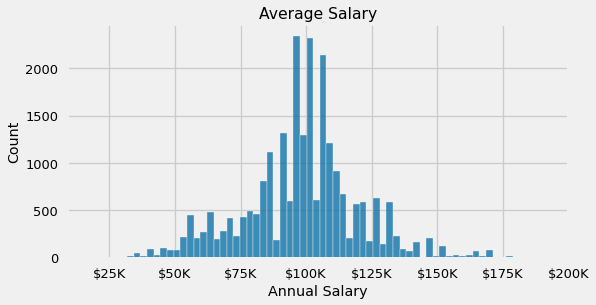

In [71]:
with plt.style.context(['fivethirtyeight','seaborn-talk', 'tableau-colorblind10']):
    
#     outliers = find_outliers_IQR(df2_orig['Annual Salary'])
    outliers = np.zeros_like(df2_orig['Annual Salary']).astype(bool)
    
    
    fig, ax = plt.subplots(figsize=(8,4))
    ax = sns.histplot(data=df2_orig[~outliers],x='Annual Salary',stat='count',bins=100,ax=ax)
    ax.xaxis.set_major_formatter(fmt_thous)
    ax.set_title('Average Salary')
    ax.set_xlim(right=200_000)

In [72]:
df2_orig['Annual Salary'].mean()

98750.83894099724

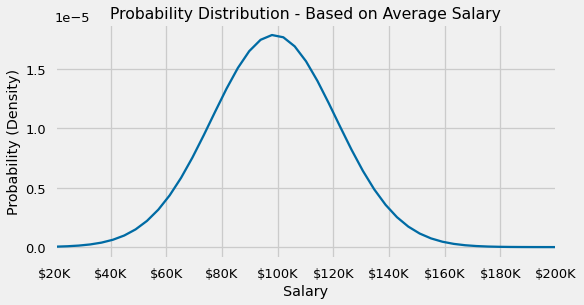

In [73]:
## calculate x values that span the data min - pad_x to data max+pad_x
temp_data = df2_orig.loc[ df2_orig['Annual Salary']< 200_000,'Annual Salary']
xs = x= np.linspace(0,200_000)


pdf = stats.norm.pdf(xs,loc=temp_data.mean(),
                      scale=temp_data.std())

with plt.style.context(['fivethirtyeight','seaborn-talk', 'tableau-colorblind10']):
    fig, ax = plt.subplots(figsize=(8,4))
    
    ax.plot(xs,pdf)
    ax.xaxis.set_major_formatter(fmt_thous)
    ax.set_title('Probability Distribution - Based on Average Salary')
    ax.set_xlim(left=20_000,right=200_000)
    ax.set(ylabel='Probability (Density)', xlabel='Salary')

In [74]:
# stats.normaltest(df2_orig.loc[~outliers, 'Annual Salary'])

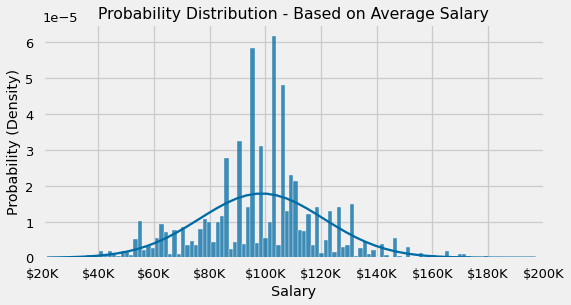

In [92]:
## calculate x values that span the data min - pad_x to data max+pad_x
temp_data = df2_orig.loc[ df2_orig['Annual Salary']< 200_000,'Annual Salary']
# xs = x= np.linspace(0,200_000)
xs = np.linspace(temp_data.min(), temp_data.max())


pdf = stats.norm.pdf(xs,loc=temp_data.mean(),
                      scale=temp_data.std())

with plt.style.context(['fivethirtyeight','seaborn-talk', 'tableau-colorblind10']):
    fig, ax = plt.subplots(figsize=(8,4))
        
#     fig, ax = plt.subplots(figsize=(8,4))
    ax = sns.histplot(data=temp_data,stat='density'
                      ,bins='auto',ax=ax)
    ax.xaxis.set_major_formatter(fmt_thous)
    ax.set_title('Average Salary')
    ax.set_xlim(right=200_000)
        
    ax.plot(xs,pdf)
    ax.xaxis.set_major_formatter(fmt_thous)
    ax.set_title('Probability Distribution - Based on Average Salary')
    ax.set_xlim(left=20_000,right=200_000)
    ax.set(ylabel='Probability (Density)', xlabel='Salary')
#     outliers = find_outliers_IQR(df2_orig['Annual Salary'])

### Test df

### Stats and Dist.  Functions

In [77]:
def get_group_stats(sample, group, measure="Height", group_col="Gender", 
                    pad_x=2, include_data=True):
    ## Slice out group data
    temp_data = sample.loc[ sample[group_col]==group, [measure]]
    
    ## calculate x values that span the data min - pad_x to data max+pad_x
    xs = x= np.linspace(temp_data.min()-pad_x, temp_data.max()+pad_x)
    
    ## Save initial data to dict (group name, group col)
    group_data = {'group_col':group_col, 'group_name':group,
                  'measure_col':measure,
                  'mean': np.mean(temp_data.values),
                  'std':np.std(temp_data.values)}
    
    pdf = stats.norm.pdf(xs,loc=group_data["mean"], 
                          scale=group_data["std"])
    
    cdf = stats.norm.cdf(xs, loc=group_data["mean"], 
                          scale=group_data["std"])
    group_data['xs'] = xs.flatten()
    group_data['pdf'] = pdf.flatten()
    group_data['cdf'] = cdf.flatten()
    
    if include_data:
        group_data['data'] = temp_data.values.flatten()
    return group_data




In [78]:
from scipy import stats




def plot_data_vs_normal_dist(scaled_data, return_data=False, figsize=(10,6)):

    ## Generate 1000 x values between min and max
    x = np.linspace(scaled_data.min(),(scaled_data.max()),num=1000)

    ## get the pdf values for the x we created
    pdf = stats.norm.pdf(x,loc=scaled_data.mean(),
                         scale=scaled_data.std())

    ## Return Data 
    if return_data:
        return x, pdf

    # OR visualize
    else:
        
        fig,ax = plt.subplots(figsize=figsize)
        ## Plot histpgram
        sns.histplot(scaled_data,stat='density',fill=False,kde=True,
                        line_kws={'lw':'4'},ax=ax);
        # Plot calculated pdf
        ax.plot(x,pdf,color='red',ls='--',lw=3,label='Normal Dist. PDF')

        ## Annotate
        ax.legend(['KDE','Normal Distrbution PDF'],#bbox_to_anchor=[1,1],
                  prop={'size':'medium'})
        ax.set_title("Comparing Our Data's KDE \nvs. Perfect Normal Distribution",y=1.02);
        # fig.tight_layout()

    
        return fig, ax
    

(<Figure size 720x432 with 1 Axes>,
 <AxesSubplot:title={'center':"Comparing Our Data's KDE \nvs. Perfect Normal Distribution"}, xlabel='Annual Salary', ylabel='Density'>)

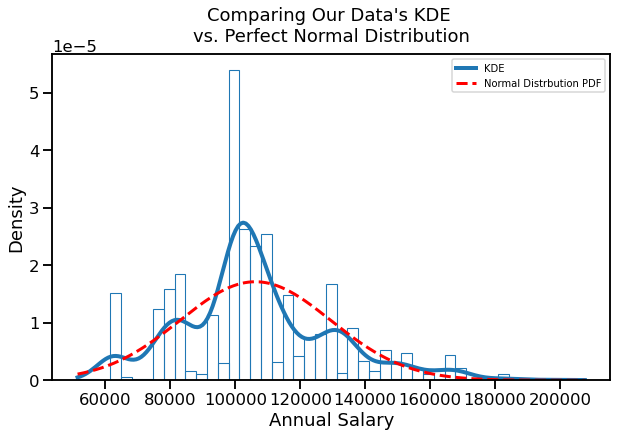

In [79]:
plot_data_vs_normal_dist(grp_fire)

(<Figure size 720x432 with 1 Axes>,
 <AxesSubplot:title={'center':"Comparing Our Data's KDE \nvs. Perfect Normal Distribution"}, xlabel='Annual Salary', ylabel='Density'>)

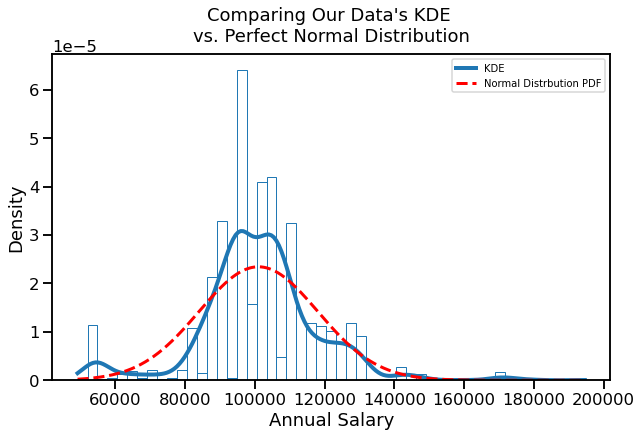

In [80]:
plot_data_vs_normal_dist(grp_police)

In [81]:
df

,Name,Job Titles,Department,Full or Part-Time,Salary or Hourly,Typical Hours,Annual Salary,Hourly Rate
0,"AARON, JEFFERY M",SERGEANT,POLICE,F,Salary,NaN,122568.0,NaN
1,"AARON, KARINA",POLICE OFFICER (ASSIGNED AS DETECTIVE),POLICE,F,Salary,NaN,110796.0,NaN
4,"ABARCA, FRANCES J",POLICE OFFICER,POLICE,F,Salary,NaN,86730.0,NaN
6,"ABBATEMARCO, JAMES J",FIRE ENGINEER-EMT,FIRE,F,Salary,NaN,118830.0,NaN
7,"ABBATE, TERRY M",POLICE OFFICER,POLICE,F,Salary,NaN,109236.0,NaN
...,...,...,...,...,...,...,...,...
31095,"ZYGMUNT, DAWID",POLICE OFFICER,POLICE,F,Salary,NaN,95586.0,NaN
31096,"ZYLINSKA, KLAUDIA",POLICE OFFICER,POLICE,F,Salary,NaN,90990.0,NaN
31097,"ZYMANTAS, LAURA C",POLICE OFFICER,POLICE,F,Salary,NaN,95586.0,NaN
31098,"ZYMANTAS, MARK E",POLICE OFFICER,POLICE,F,Salary,NaN,102372.0,NaN


# Generating Data

In [ ]:
import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats

sns.set_context('talk')
# mpl.rcParams['figure.figsize'] = [12,6]
mpl.rcParams['figure.facecolor'] = 'white'

In [ ]:
# rand_seed = 321
groups = {}

# np.random.seed(rand_seed)
for i in range(3):
    
    temp = np.random.normal(loc=25, scale=2, size=20,)
    groups[f"Group_{i}"] = temp

df = pd.DataFrame(groups)
df.head(2)

In [ ]:
melted = pd.melt(df)
melted.head()

In [ ]:
sns.catplot(data=melted, x='variable', y='value')

In [ ]:
sns.histplot(data=melted,x='value')

In [ ]:
ax = sns.histplot(data=melted,x='value',hue='variable')


In [ ]:
ax = sns.barplot(data=melted,y='value',x='variable')


In [ ]:
# Generating Data

import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats

sns.set_context('talk')
# mpl.rcParams['figure.figsize'] = [12,6]
mpl.rcParams['figure.facecolor'] = 'white'

# rand_seed = 321
groups = {}

# np.random.seed(rand_seed)
for i in range(3):
    
    temp = np.random.normal(loc=25, scale=2, size=20,)
    groups[f"Group_{i}"] = temp

df = pd.DataFrame(groups)
df.head(2)

melted = pd.melt(df)
melted.head()

sns.catplot(data=melted, x='variable', y='value')

sns.histplot(data=melted,x='value')

ax = sns.histplot(data=melted,x='value',hue='variable')


ax = sns.barplot(data=melted,y='value',x='variable')


